In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", None)

In [94]:
data = pd.read_csv('../data/processed/cleaned_break_data.csv')
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
1419,-80.460623,43.461310,9470,1716,2012-01-03 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,15746,ROSEMOUNT DR,33440,150.0,1959.0,CI,Y,010b933e-2bdb-4ea3-8bf5-262d892d71d0
2171,-80.451009,43.452135,10249,2411,2018-12-28 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10220,CROSBY DR,8660,150.0,1960.0,CI,Y,cfcd5d71-79e2-428b-ac1e-69340e008811
178,-80.458021,43.453854,8174,1439,2010-01-10 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,CIRCUMFERENTIAL,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,9945,KENWOOD DR,21220,150.0,1964.0,CI,Y,fcec7fea-04e6-40e6-a96b-775019203be4
2365,-80.495051,43.451873,15041,192436,2019-12-10 08:24:52+00:00,MAIN,4-8 hours,0-50,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,8939,KING ST W,86784,300.0,1976.0,DI,Y,37f61acf-de4b-46d9-959a-04cad7f6a493
1808,-80.528454,43.441606,9874,2281,2017-07-27 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8672,HAZELGLEN DR,18280,300.0,1968.0,DI,Y,43840016-d13a-498e-9063-a9d0f0ddaac2


In [95]:
data.shape

(2544, 26)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONGITUDE                    2544 non-null   float64
 1   LATITUDE                     2544 non-null   float64
 2   OBJECTID                     2544 non-null   int64  
 3   WATBREAKINCIDENTID           2544 non-null   int64  
 4   INCIDENT_DATE                2544 non-null   object 
 5   BREAK_TYPE                   2544 non-null   object 
 6   HOUR_IMPACTED                2544 non-null   object 
 7   UNITS_IMPACTED               2544 non-null   object 
 8   STATUS                       2544 non-null   object 
 9   BREAK_NATURE                 2544 non-null   object 
 10  BREAK_APPARENT_CAUSE         2544 non-null   object 
 11  POSITIVE_PRESSURE_MAINTANED  2544 non-null   object 
 12  AIR_GAP_MAINTANED            2544 non-null   object 
 13  MECHANICAL_REMOVAL

In [97]:
from datetime import datetime, date
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE']).dt.date

In [98]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
1452,-80.451727,43.440585,9505,1644,2011-12-15,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,13226,KENNETH AVE,21040,150.0,1958.0,CI,Y,6a4ca30f-4960-4970-97f0-1e2dfc0a061c
1343,-80.476827,43.431183,9389,1641,1995-01-01,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,70140,HOFFMAN ST,19660,150.0,1956.0,CI,N,d88c1f20-6195-442b-a1cd-919dec7d4fcd
937,-80.526911,43.425131,8970,947,1999-08-17,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,5620,HILLBROOK CRES,92238,150.0,1972.0,DI,Y,732aa38a-104d-4bb3-befe-e3acf77e32a3
801,-80.525194,43.439297,8827,1385,2009-05-01,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8727,HAZELGLEN DR,18310,300.0,1969.0,DI,Y,d6fb483c-1cac-4f71-93f7-46d1856a58dd
1737,-80.487561,43.430786,9801,298,1998-12-27,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11419,HIGHLAND RD E,19090,300.0,1955.0,CI,Y,2a28576a-2a5f-4d9a-b505-1f749b444321


Possible columns to drop:
- Global ID
- Units Impacted
- Hours Impacted
- possibly more after further analysis...


In [99]:
data['HOUR_IMPACTED'].value_counts()

8-12 hours     2384
4-8 hours       143
20-24 hours      10
16-20 hours       5
12-16 hours       2
Name: HOUR_IMPACTED, dtype: int64

In [100]:
data['UNITS_IMPACTED'].value_counts()

0            2354
0-50          182
50-100          3
100-150         2
200-10000       2
47              1
Name: UNITS_IMPACTED, dtype: int64

Can't really see these variables being too valuable for any sort of model so we can go ahead and remove them along with Global ID

In [101]:
data.drop(['GLOBALID', 'HOUR_IMPACTED', 'UNITS_IMPACTED'], axis=1, inplace=True)

In [102]:
data.isna().sum() # just double checking even though we already cleaned the data in our other notebook

LONGITUDE                      0
LATITUDE                       0
OBJECTID                       0
WATBREAKINCIDENTID             0
INCIDENT_DATE                  0
BREAK_TYPE                     0
STATUS                         0
BREAK_NATURE                   0
BREAK_APPARENT_CAUSE           0
POSITIVE_PRESSURE_MAINTANED    0
AIR_GAP_MAINTANED              0
MECHANICAL_REMOVAL             0
FLUSHING_EXCAVATION            0
HIGHER_VELOCITY_FLUSHING       0
ANODE_INSTALLED                0
BREAK_CATEGORIZATION           0
ROADSEGMENTID                  0
STREET                         0
ASSETID                        0
ASSET_SIZE                     0
ASSET_YEAR_INSTALLED           0
ASSET_MATERIAL                 0
ASSET_EXISTS                   0
dtype: int64

In [103]:
data['ASSET_MATERIAL'].value_counts()

CI      1575
DI       531
PVC      320
PVCO      60
CPP       19
XXX       14
HDPE      11
AC         9
PVCB       2
COP        2
PE         1
Name: ASSET_MATERIAL, dtype: int64

In [104]:
data['ASSETID'].nunique()

1309

In [105]:
num_break = {}

for pipe in data['ASSETID']:
    if pipe in num_break:
        num_break[pipe] += 1
    else:
        num_break[pipe] = 1

In [106]:
data['NUM_BREAKS'] = data['ASSETID'].map(num_break)

In [107]:
data.sample(10)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
775,-80.443516,43.455591,8799,851,2003-10-14,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,23224,OLD YORK CRES,28590,150.0,1967.0,DI,Y,4
2124,-80.485825,43.483584,10202,2241,2017-01-04,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,12610,BRIDGE ST W,4530,150.0,1958.0,CI,Y,8
1592,-80.464974,43.442053,9651,117,2002-12-06,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10143,WEBER ST E,41000,150.0,1948.0,CI,Y,2
1423,-80.458478,43.450740,9474,1721,2012-01-11,MAIN,REPAIR COMPLETED,UNKNOWN,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,22914,LYNDHURST DR,24610,150.0,1958.0,CI,Y,3
1316,-80.417515,43.440551,9362,1041,1999-07-15,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,22429,FAIRWAY CRES,83826,150.0,1995.0,PVC,Y,2
1154,-80.525256,43.439352,9191,904,2003-05-01,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8727,HAZELGLEN DR,18310,300.0,1969.0,DI,Y,6
849,-80.501140,43.453779,8880,1744,2012-07-18,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1734,KING ST W,21450,250.0,1889.0,CI,N,1
1687,-80.514166,43.434237,9748,802,1999-11-24,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,21017,OVERLEA DR,29830,150.0,1966.0,DI,Y,3
1188,-80.455694,43.433980,9226,1567,2011-01-04,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,13306,SECOND AVE,34210,200.0,1953.0,CI,Y,1
1554,-80.534859,43.440270,9613,930,2001-05-29,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8667,HAZELGLEN DR,18250,300.0,1969.0,DI,Y,1


In [108]:
data.shape

(2544, 24)

In [109]:
data.NUM_BREAKS.sum()

8074

In [110]:
data['ASSET_YEAR_INSTALLED'] = pd.to_datetime(data['ASSET_YEAR_INSTALLED'], format='%Y').dt.date

In [111]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
1438,-80.448539,43.459820,9490,775,1998-03-31,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,15908,CARSON DR,5610,200.0,1966-01-01,DI,Y,5
2390,-80.509159,43.416773,20167,193256,2020-01-31,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,6412,NINE PINES RD,27810,150.0,1960-01-01,CI,Y,8
2196,-80.469995,43.442824,10274,2400,2018-12-02,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11696,OTTAWA ST N,29200,150.0,1952-01-01,CI,Y,12
322,-80.526404,43.440283,8323,875,2001-04-25,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1296,HAZELGLEN DR,18300,300.0,1968-01-01,DI,Y,1
627,-80.471533,43.448310,8640,84,1999-03-24,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11482,STIRLING AVE N,133420,150.0,2014-01-01,PVCO,N,2


In [112]:
data['ASSET_YEAR_INSTALLED'].min()

datetime.date(1889, 1, 1)

In [113]:
data['ASSET_YEAR_INSTALLED'].max()

datetime.date(2018, 1, 1)

In [114]:
data['INCIDENT_DATE'].min()

datetime.date(1985, 1, 1)

In [115]:
data['AGE'] = (np.floor((pd.to_datetime(data['INCIDENT_DATE']) - 
                        pd.to_datetime(data['ASSET_YEAR_INSTALLED'])).dt.days / 365.25)).astype(int)

# the following code is something I found on stack overflow that
# helped me calculate the age in years of each pipe

# df['age'] = (np.floor((pd.to_datetime(df['dte']) - 
#              pd.to_datetime(dob)).dt.days / 365.25)).astype(int)

In [116]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS,AGE
938,-80.462870,43.432591,8972,343,2005-02-19,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,13317,CORNELL AVE,92028,150.0,1957-01-01,CI,Y,2,48
1285,-80.514090,43.428028,9329,1736,2012-02-19,MAIN,REPAIR COMPLETED,UNKNOWN,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,6217,FOREST HILL DR,14870,200.0,1962-01-01,CI,Y,6,50
2141,-80.484183,43.433637,10219,1817,2013-10-10,MAIN,REPAIR COMPLETED,CORROSION,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,11414,MEINZINGER AVE,134846,150.0,2016-01-01,PVC,N,5,-3
1668,-80.466064,43.442036,9729,53,2003-07-13,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11717,SHELDON AVE N,34640,150.0,1925-01-01,CI,N,3,78
114,-80.537029,43.441890,8107,913,2002-04-02,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6094,WESTWOOD DR,42910,300.0,1969-01-01,DI,Y,3,33


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONGITUDE                    2544 non-null   float64
 1   LATITUDE                     2544 non-null   float64
 2   OBJECTID                     2544 non-null   int64  
 3   WATBREAKINCIDENTID           2544 non-null   int64  
 4   INCIDENT_DATE                2544 non-null   object 
 5   BREAK_TYPE                   2544 non-null   object 
 6   STATUS                       2544 non-null   object 
 7   BREAK_NATURE                 2544 non-null   object 
 8   BREAK_APPARENT_CAUSE         2544 non-null   object 
 9   POSITIVE_PRESSURE_MAINTANED  2544 non-null   object 
 10  AIR_GAP_MAINTANED            2544 non-null   object 
 11  MECHANICAL_REMOVAL           2544 non-null   object 
 12  FLUSHING_EXCAVATION          2544 non-null   object 
 13  HIGHER_VELOCITY_FL

In [118]:
data.columns = data.columns.str.lower()

In [119]:
data.columns

Index(['longitude', 'latitude', 'objectid', 'watbreakincidentid',
       'incident_date', 'break_type', 'status', 'break_nature',
       'break_apparent_cause', 'positive_pressure_maintaned',
       'air_gap_maintaned', 'mechanical_removal', 'flushing_excavation',
       'higher_velocity_flushing', 'anode_installed', 'break_categorization',
       'roadsegmentid', 'street', 'assetid', 'asset_size',
       'asset_year_installed', 'asset_material', 'asset_exists', 'num_breaks',
       'age'],
      dtype='object')

In [120]:
data['status'].value_counts()

REPAIR COMPLETED       2526
CANCELLED                16
UNDER INVESTIGATION       2
Name: status, dtype: int64

In [121]:
data.drop('status', axis=1, inplace=True)

In [122]:
data['break_type'].value_counts()

MAIN       2524
SERVICE      20
Name: break_type, dtype: int64

In [123]:
data['break_nature'].value_counts()

UNKNOWN                                      1998
CIRCUMFERENTIAL                               338
CORROSION                                      72
FITTING/JOINT                                  50
LONGITUDINAL                                   29
CIRCUMFERENTIAL AND FITTING/JOINT              23
CORROSION AND CIRCUMFERENTIAL                  14
WATER SERVICE                                   6
CORROSION AND LONGITUDINAL                      6
CORROSION AND FITTING/JOINT                     5
FITTING/JOINT AND LONGITUDINAL                  2
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64

In [124]:
data['break_apparent_cause'].value_counts()

OTHER             1907
AGE                196
UNKNOWN            153
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: break_apparent_cause, dtype: int64

In [125]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,asset_exists,num_breaks,age
2005,-80.457822,43.425147,10079,1447,2010-01-24,MAIN,FITTING/JOINT,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,22974,SIEBERT AVE,133694,150.0,2015-01-01,PVC,N,2,-5
2532,-80.469004,43.462795,46081,144494,2022-01-03,MAIN,CIRCUMFERENTIAL,PRESSURE,Y,Y,Y,Y,Y,Y,CATEGORY 1,12662,VICTORIA ST N,39560,200.0,1953-01-01,CI,Y,1,69
493,-80.468899,43.446853,8501,1273,2001-08-31,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10169,EAST AVE,11060,300.0,1949-01-01,CI,Y,2,52
1350,-80.515016,43.430406,9397,1432,2009-12-29,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,20908,WARREN RD,40470,150.0,1988-01-01,DI,Y,1,21
1892,-80.477470,43.481067,9961,1059,2007-01-20,MAIN,CIRCUMFERENTIAL AND FITTING/JOINT,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,13126,BLOOMINGDALE RD,3440,300.0,1964-01-01,CI,Y,4,43


We can see that we've got 7 columns where there are what we can call "binary" values - Y (yes) & N (no). We're going to one-hot encode these variables so we can start to put the data into proper modeling format but first, we'll double check to make sure that there are only 2 values for each column.

In [126]:
binary_cols = data[['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

Y    2540
N       4
Name: positive_pressure_maintaned, dtype: int64
Y    2540
N       4
Name: air_gap_maintaned, dtype: int64
Y    2531
N      13
Name: mechanical_removal, dtype: int64
Y    2536
N       8
Name: flushing_excavation, dtype: int64
Y    2539
N       5
Name: higher_velocity_flushing, dtype: int64
Y    2500
N      44
Name: anode_installed, dtype: int64
Y    2005
N     539
Name: asset_exists, dtype: int64


In [127]:
binary_cols = ['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']

data = pd.get_dummies(data, columns=binary_cols, drop_first=True)

In [128]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned_Y,air_gap_maintaned_Y,mechanical_removal_Y,flushing_excavation_Y,higher_velocity_flushing_Y,anode_installed_Y,asset_exists_Y
2014,-80.441590,43.445441,10089,1545,2010-12-13,MAIN,CORROSION,COMBINATION,CATEGORY 1,13205,BRADLEY DR,4010,150.0,1965-01-01,CI,3,45,1,1,1,1,1,1,1
1624,-80.460306,43.423959,9684,1411,2009-11-15,MAIN,UNKNOWN,OTHER,CATEGORY 1,10094,HILLMOUNT ST,19530,150.0,1967-01-01,CI,4,42,1,1,1,1,1,1,1
145,-80.494295,43.402179,8139,1131,2007-04-27,MAIN,UNKNOWN,OTHER,CATEGORY 1,9723,BLEAMS RD,85956,450.0,2002-01-01,PVC,1,5,1,1,1,1,1,1,1
1892,-80.477470,43.481067,9961,1059,2007-01-20,MAIN,CIRCUMFERENTIAL AND FITTING/JOINT,AGE,CATEGORY 1,13126,BLOOMINGDALE RD,3440,300.0,1964-01-01,CI,4,43,1,1,1,1,1,1,1
910,-80.501317,43.426824,8942,1258,2008-12-01,MAIN,UNKNOWN,OTHER,CATEGORY 1,6564,STONYBROOK DR,91090,100.0,1958-01-01,CI,1,50,1,1,1,1,1,1,1


In [129]:
binary_cols = data[['positive_pressure_maintaned_Y', 'air_gap_maintaned_Y', 'mechanical_removal_Y', 
                    'flushing_excavation_Y', 'higher_velocity_flushing_Y', 'anode_installed_Y', 'asset_exists_Y']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

1    2540
0       4
Name: positive_pressure_maintaned_Y, dtype: int64
1    2540
0       4
Name: air_gap_maintaned_Y, dtype: int64
1    2531
0      13
Name: mechanical_removal_Y, dtype: int64
1    2536
0       8
Name: flushing_excavation_Y, dtype: int64
1    2539
0       5
Name: higher_velocity_flushing_Y, dtype: int64
1    2500
0      44
Name: anode_installed_Y, dtype: int64
1    2005
0     539
Name: asset_exists_Y, dtype: int64


In [130]:
data = data.rename(columns={'positive_pressure_maintaned_Y': 'positive_pressure_maintaned',
                            'air_gap_maintaned_Y': 'air_gap_maintaned',
                            'mechanical_removal_Y': 'mechanical_removal',
                            'flushing_excavation_Y': 'flushing_excavation',
                            'higher_velocity_flushing_Y': 'higher_velocity_flushing',
                            'anode_installed_Y': 'anode_installed',
                            'asset_exists_Y': 'asset_exists'})

Columns to transform still:
- break type
- break nature
- break apparent cause
- break categorization
- asset material
- maybe think about dropping the street name since that would only be for EDA use

In [131]:
cat_cols = data[['break_type', 'break_nature', 'break_apparent_cause',
                 'break_categorization', 'asset_material']]

for col in cat_cols:
    print(cat_cols[col].value_counts(), "\n" + "-"*55)

MAIN       2524
SERVICE      20
Name: break_type, dtype: int64 
-------------------------------------------------------
UNKNOWN                                      1998
CIRCUMFERENTIAL                               338
CORROSION                                      72
FITTING/JOINT                                  50
LONGITUDINAL                                   29
CIRCUMFERENTIAL AND FITTING/JOINT              23
CORROSION AND CIRCUMFERENTIAL                  14
WATER SERVICE                                   6
CORROSION AND LONGITUDINAL                      6
CORROSION AND FITTING/JOINT                     5
FITTING/JOINT AND LONGITUDINAL                  2
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64 
-------------------------------------------------------
OTHER             1907
AGE                196
UNKNOWN            153
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: 

I'll break down what I'm thinking for how I'm going to encode these columns:

Break type is easy and I'll just one hot encode it or use `get_dummies`. Break nature is going to be a little trickier since it has high cardinality/dimensionality. I think I'm going to combine the features that have matching break nature as the first name for the feature. For example - `CIRCUMFERENTIAL AND FITTING/JOINT` will be added to `CIRCUMFERENTIAL`. `CORROSION` has a lot of subcategories and so all of those will be joined into the original `CORROSION` column. Lastly `FITTING/JOINT AND LONGITUDINAL` will be added to `FITTING/JOINT`.

For break apparent cause I'll add the `UNKNOWN` values into `OTHER` to be consistent since `OTHER` is the majority value.

Break categorization is relatively easy as well and I can OH encode them or use `get_dummies` again.

I'm currently doing some digging on the different asset materials to see what can be done for these values. I'm already doubting I can combine any since they represent unique pipe materials but maybe research will help turn something up.
- CI = Cast Iron
- DI = Ductile Iron
- PVC = Polyvinyl Chloride
- PVCO = Molecularly Oriented PVC
- CPP = Concrete Pressure Pipe
- XXX = this one is still a mystery
- HDPE = High-density Polyethylene
- AC = Asbestos Cement
- PVCB = not exactly sure what this could be. A google search turns up only these types of PVC pipes:
    - Unplasticized PVC (PVC-U)
    - Chlorinated PVC (C-PVC)
    - Molecularly oriented (PVC-O)
    - High-impact PVC (PVC-Hi)
- COP = Copper
- PE = polyethylene

In [132]:
data['break_nature'] = data['break_nature'].replace(['CIRCUMFERENTIAL AND FITTING/JOINT'], 'CIRCUMFERENTIAL')
data['break_nature'] = data['break_nature'].replace(['CORROSION AND CIRCUMFERENTIAL',
                                                         'CORROSION AND LONGITUDINAL',
                                                         'CORROSION AND FITTING/JOINT',
                                                         'CORROSION - ROBAR SADDLE CORRODED AT SEAM'], 'CORROSION')
data['break_nature'] = data['break_nature'].replace(['FITTING/JOINT AND LONGITUDINAL'], 'FITTING/JOINT')

In [133]:
data.break_nature.value_counts()

UNKNOWN            1998
CIRCUMFERENTIAL     361
CORROSION            98
FITTING/JOINT        52
LONGITUDINAL         29
WATER SERVICE         6
Name: break_nature, dtype: int64

In [134]:
data['break_apparent_cause'] = data['break_apparent_cause'].replace(['UNKNOWN'], 'OTHER')

In [135]:
data.break_apparent_cause.value_counts()

OTHER             2060
AGE                196
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: break_apparent_cause, dtype: int64

In [136]:
data['age'].describe()

count    2544.000000
mean       39.938679
std        23.414258
min       -33.000000
25%        33.000000
50%        45.000000
75%        54.000000
max       124.000000
Name: age, dtype: float64

In [137]:
num_neg = [age for age in data['age'] if age < 0]

In [138]:
len(num_neg)

320

In [139]:
import seaborn as sns

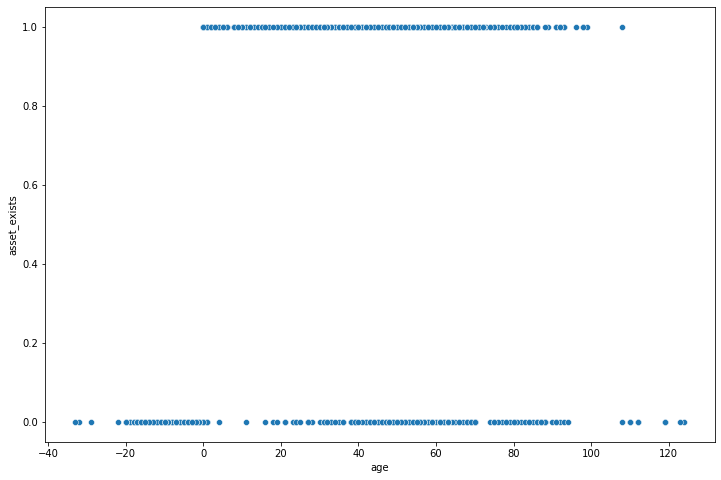

In [140]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='age', y='asset_exists')
plt.show();

I wanted to see what the range for the negative ages were since there are a decent amount of negative ages. The possibility of ages to be negative is from the replacement of the pipes since their last break. For instance, the one pipe had a break in 2001 but was replaced in 2006 so it has an age of -5.

Technically what I could do is remove all instances where the asset does not exist since we're only insterested in predicting the failure of an existing pipe.

In [141]:
connections = {}

for pipe in data['roadsegmentid']:
    if pipe in connections:
        connections[pipe] += 1
    else:
        connections[pipe] = 1
        
data['connections'] = data['roadsegmentid'].map(connections)

In [142]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
1475,-80.468992,43.468252,9528,1211,2008-03-15,MAIN,UNKNOWN,OTHER,CATEGORY 1,604222,RIVERBEND DR,32880,200.0,1962-01-01,CI,7,46,1,1,1,1,1,1,1,3
2261,-80.508521,43.435887,10345,2317,2017-12-30,MAIN,UNKNOWN,OTHER,CATEGORY 1,6513,HEARTH CRES,18320,150.0,1958-01-01,CI,2,59,1,1,1,1,1,1,1,3
2174,-80.527868,43.446930,10252,2395,2018-11-26,MAIN,UNKNOWN,OTHER,CATEGORY 1,8717,INWOOD DR,20420,150.0,1966-01-01,DI,2,52,1,1,1,1,1,1,1,2
913,-80.470420,43.453109,8945,1075,2007-01-29,MAIN,UNKNOWN,OTHER,CATEGORY 1,9769,MELROSE AVE,76686,150.0,2010-01-01,PVC,3,-3,1,1,1,1,1,1,0,3
2019,-80.503644,43.428491,10094,1574,2011-01-11,MAIN,CIRCUMFERENTIAL,COMBINATION,CATEGORY 1,6573,GREENBROOK DR,89754,100.0,1958-01-01,DI,1,53,1,1,1,1,1,1,1,6


In [143]:
data.roadsegmentid.value_counts()

11697    15
11696    13
10015    11
12610    11
6499     11
         ..
11438     1
9952      1
13118     1
9937      1
70501     1
Name: roadsegmentid, Length: 1118, dtype: int64

In [144]:
data['roadsegmentid'].value_counts().describe()

count    1118.000000
mean        2.275492
std         1.864513
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: roadsegmentid, dtype: float64

I really want to start doing some baseline models now so I'm going to create possibly a few subsets containing different features, process them if needed, and then fit and train them.

In [145]:
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['incident_date'].sample(1)

1408   2000-02-03
Name: incident_date, dtype: datetime64[ns]

In [146]:
data['asset_year_installed'] = pd.to_datetime(data['asset_year_installed'])

In [147]:
data['incident_date'].dt.year.value_counts()

2003    143
2011    137
2015    134
2014    132
2010    125
2000    119
2007    119
1999    117
2002    115
2013    105
1998    102
2005    102
2001    100
1997     94
2009     94
2018     89
2004     88
2019     88
2006     82
2008     81
2021     81
2017     78
2020     72
2016     68
2012     56
2022     13
1985      3
1987      2
1986      1
1996      1
1995      1
1991      1
1992      1
Name: incident_date, dtype: int64

In [148]:
data['asset_exists'].value_counts()

1    2005
0     539
Name: asset_exists, dtype: int64

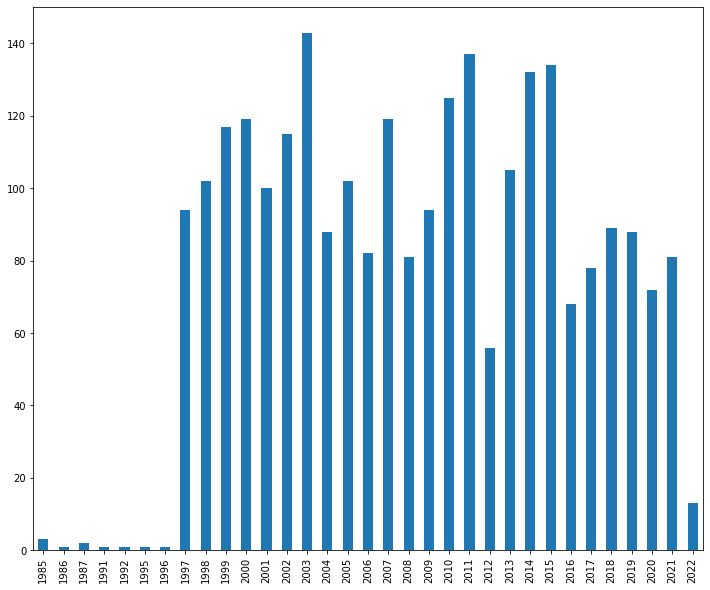

In [149]:
# display the number of breaks per year with seaborn
plt.figure(figsize=(12, 10))
data['incident_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show();

In [150]:
breaks_per_year = pd.Series(data['incident_date'].dt.year.value_counts().sort_index())
breaks_per_year.index

Int64Index([1985, 1986, 1987, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

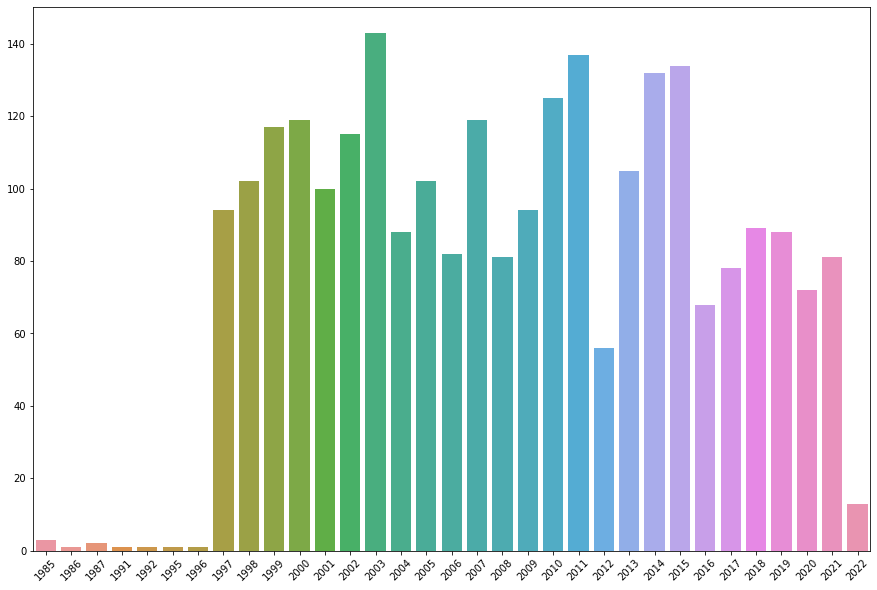

In [151]:
plt.figure(figsize=(15, 10))
sns.barplot(x=breaks_per_year.index, y=breaks_per_year.values)
plt.xticks(rotation=45)
plt.show();

Let's drop observations where the asset doesn't exist.

In [152]:
# shape before dropping
print(data.shape)
data = data[data['asset_exists'] == 1]
# shape after dropping
print(data.shape)

(2544, 25)
(2005, 25)


In [153]:
data.head()

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,1,2252,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,7874,1311,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,7875,1325,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,1328,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,7877,1308,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1,1


In [154]:
# drop watbreakincidentid
data.drop('watbreakincidentid', axis=1, inplace=True)

In [155]:
data.head()

,longitude,latitude,objectid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,1,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,7874,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,7875,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,7877,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1,1


Let's encode our categorical variables and start to save the data as a separate set so we keep some originality for the EDA.

Categories to encode:
- `break_type`
- `break_nature`
- `break_apparent_cause`
- `break_categorization`
- `asset_material`

In [156]:
data['objectid'].nunique()

2005

In [157]:
data_copy = data.copy()
data_copy.drop(['objectid', 'street', 'assetid'], axis=1, inplace=True)

In [158]:
# make sure there aren't any negative ages anymore
data_copy['age'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age, dtype: float64

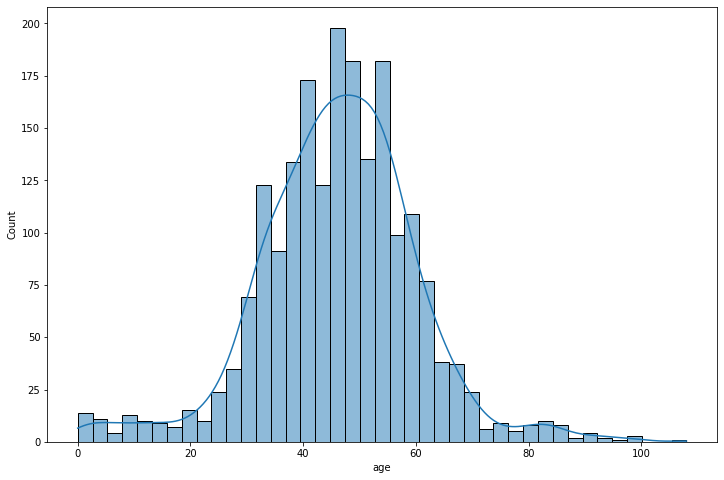

In [159]:
plt.figure(figsize=(12, 8))
sns.histplot(data_copy['age'], kde=True)
plt.show();

I'll visualize all of the unique values for each category that needs to be encoded so I know how many different values are in each column. I could get dummy variables for the categories but that would increase the feature space more than I would like. I thought about just creating a dictionary of each column with corresponding values and mapping them to the column but this could also be time consuming. Let's try and use pandas to our advantage here and convert each column to a category and call the `cat.codes` on them, this is known as label encoding.

In [160]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

MAIN       1988
SERVICE      17
Name: break_type, dtype: int64
------------------------------
UNKNOWN            1550
CIRCUMFERENTIAL     318
CORROSION            80
FITTING/JOINT        28
LONGITUDINAL         24
WATER SERVICE         5
Name: break_nature, dtype: int64
------------------------------
OTHER             1598
AGE                162
COMBINATION        116
CORROSION           89
PRESSURE            19
SOILS               16
FAULTY INSTALL       5
Name: break_apparent_cause, dtype: int64
------------------------------
CATEGORY 1    1905
UNKNOWN         92
CATEGORY 2       8
Name: break_categorization, dtype: int64
------------------------------
CI      1417
DI       488
PVC       57
XXX       14
CPP       14
AC         9
PVCO       3
COP        2
HDPE       1
Name: asset_material, dtype: int64
------------------------------


In [161]:
for feature in data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]:
    data_copy[feature] = data_copy[feature].astype('category')
    data_copy[feature] = data_copy[feature].cat.codes


In [162]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,2017-12-01,0,1,0,1,6961,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,2001-03-26,1,4,4,0,6116,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,2006-09-06,1,4,4,0,13207,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,6498,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,2000-01-27,1,4,4,0,22846,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1,1


In [163]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

0    1988
1      17
Name: break_type, dtype: int64
------------------------------
4    1550
0     318
1      80
2      28
3      24
5       5
Name: break_nature, dtype: int64
------------------------------
4    1598
0     162
1     116
2      89
5      19
6      16
3       5
Name: break_apparent_cause, dtype: int64
------------------------------
0    1905
2      92
1       8
Name: break_categorization, dtype: int64
------------------------------
1    1417
4     488
6      57
8      14
3      14
0       9
7       3
2       2
5       1
Name: asset_material, dtype: int64
------------------------------


In [164]:
data_copy.drop('roadsegmentid', axis=1, inplace=True)

In [165]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,2017-12-01,0,1,0,1,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,2001-03-26,1,4,4,0,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,2006-09-06,1,4,4,0,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,2000-01-27,1,4,4,0,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1,1


In [166]:
data_copy['asset_size'].value_counts()

150.0     1408
200.0      242
300.0      231
450.0       45
100.0       42
25.0        10
600.0        7
50.0         6
1200.0       5
250.0        4
13.0         3
750.0        2
Name: asset_size, dtype: int64

In [167]:
data_copy.rename(columns={'age': 'age_at_break'}, inplace=True)

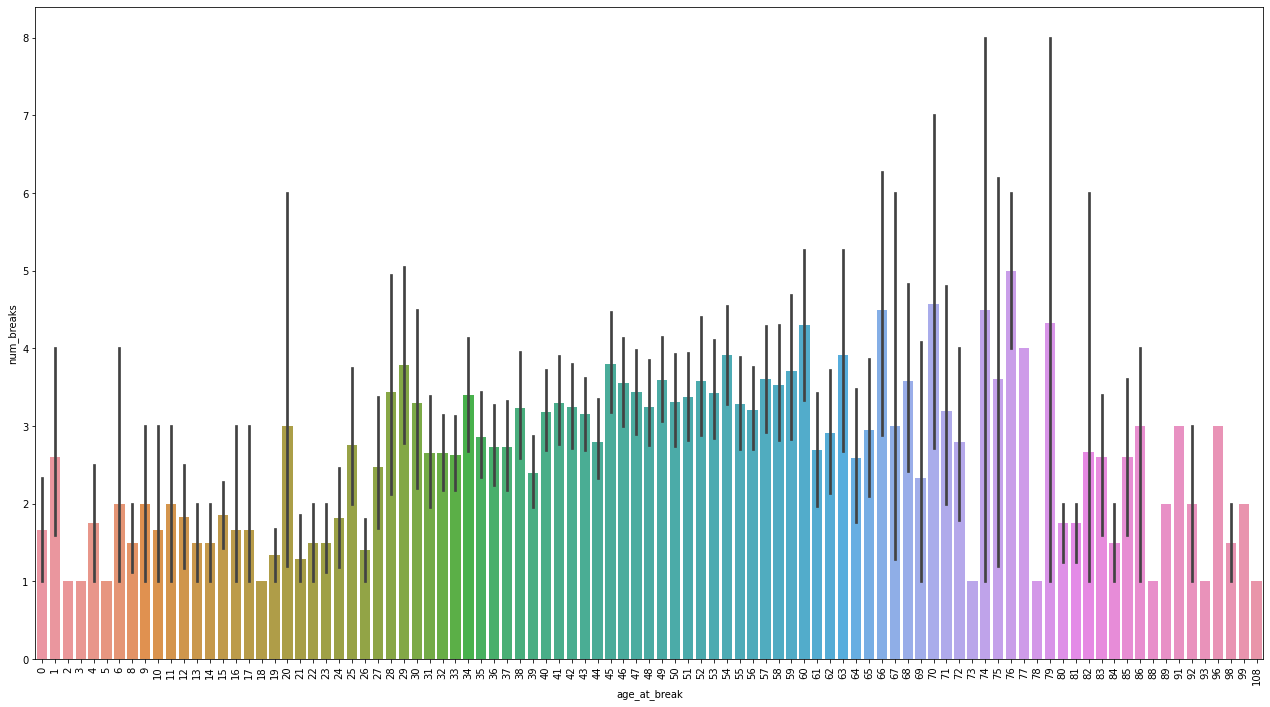

In [168]:
plt.figure(figsize=(22, 12))
sns.barplot(data=data_copy, x='age_at_break', y='num_breaks')
plt.xticks(rotation=90)
plt.show();

In [169]:
data_copy['num_breaks'].describe()

count    2005.000000
mean        3.166085
std         2.328091
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: num_breaks, dtype: float64

In [170]:
data_copy['age_at_break'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [171]:
max_age = data_copy['age_at_break'].max()
num_breaks_max_age = data_copy['num_breaks'].loc[data_copy['age_at_break'] == max_age]

max_age_failure_rate = num_breaks_max_age / max_age

print(max_age_failure_rate)

1253    0.009259
Name: num_breaks, dtype: float64


In [172]:
# how many values have age_at_break = 0
data_copy['age_at_break'].loc[data_copy['age_at_break'] == 0].count()

6

In [173]:
# calculate the failure rate from num_breaks and age
data_copy['failure_rate'] = round(data_copy['num_breaks'] / data_copy['age_at_break'], 2)
data_copy.sample(5)

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections,failure_rate
178,-80.458021,43.453854,2010-01-10,0,0,0,0,150.0,1964-01-01,1,2,46,1,1,1,1,1,1,1,2,0.04
2314,-80.449256,43.445966,2019-02-01,0,0,0,0,300.0,1964-01-01,4,2,55,1,1,1,1,1,1,1,3,0.04
1327,-80.452309,43.427781,2009-02-04,0,4,4,0,150.0,1954-01-01,1,1,55,1,1,1,1,1,1,1,7,0.02
1234,-80.466224,43.427047,1997-09-11,0,4,4,0,300.0,1970-01-01,4,2,27,1,1,1,1,1,1,1,2,0.07
1763,-80.465486,43.456733,2002-12-23,0,4,4,0,150.0,1953-01-01,1,1,49,1,1,1,1,1,1,1,1,0.02


In [174]:
data_copy['age_at_break'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [175]:
data_copy['failure_rate'].describe()

count    2005.00
mean         inf
std          NaN
min         0.01
25%         0.03
50%         0.06
75%         0.10
max          inf
Name: failure_rate, dtype: float64

In [176]:
# display failure rates that are inf
data_copy['failure_rate'].loc[data_copy['failure_rate'] == np.inf]

657     inf
1167    inf
1325    inf
1410    inf
1466    inf
1806    inf
Name: failure_rate, dtype: float64

In [180]:
# print failure rates that are inf
infinity_failure_rates = data_copy[data_copy['failure_rate']== np.inf]
infinity_failure_rates

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections,failure_rate
657,-80.492340,43.445806,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,1,inf
1167,-80.484931,43.456100,2001-07-03,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,3,inf
1325,-80.438473,43.406985,2000-12-11,0,4,4,0,50.0,2000-01-01,6,1,0,1,1,1,1,1,1,1,1,inf
1410,-80.484936,43.456094,2001-07-06,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,3,inf
1466,-80.490677,43.444917,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,1,inf
1806,-80.508320,43.440505,2017-07-24,0,4,4,0,150.0,2017-01-01,7,1,0,1,1,1,1,1,0,1,2,inf


In [179]:
# data_copy['failure_rate'].loc[data_copy['failure_rate'] == np.inf] = 0